In [3]:
pip install Ta-Lib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import talib
import seaborn
import matplotlib as mpl
import numpy as np
import pandas as pd
#import math
from matplotlib import style
import pandas_datareader.data as web   
import datetime

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
style.use('ggplot')
start = datetime.datetime(2013,4,1)
end = datetime.datetime(2017,4,1)
data = web.DataReader("AAPL", "yahoo", start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-04-01,63.385715,61.105713,63.128571,61.272858,97433000.0,45.166916
2013-04-02,62.591427,60.914288,61.085712,61.398571,132379800.0,45.259586
2013-04-03,62.468571,61.472858,61.624287,61.712856,90804000.0,45.491261
2013-04-04,62.142857,60.750000,61.965714,61.102856,89611900.0,45.041603
2013-04-05,60.707142,59.954285,60.642857,60.457142,95923800.0,44.565617


EMA Exponential Moving Average
MACD Moving Average Convergence/Divergence
DIF>DEA金叉
DIF<DEA死叉
多指标的共振，靠谱程度大幅度上升

In [16]:
ta.BBANDS?

In [17]:
data['upper'], data['middle'], data['lower'] = ta.BBANDS(np.asarray(data['Close']),
                                                     timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

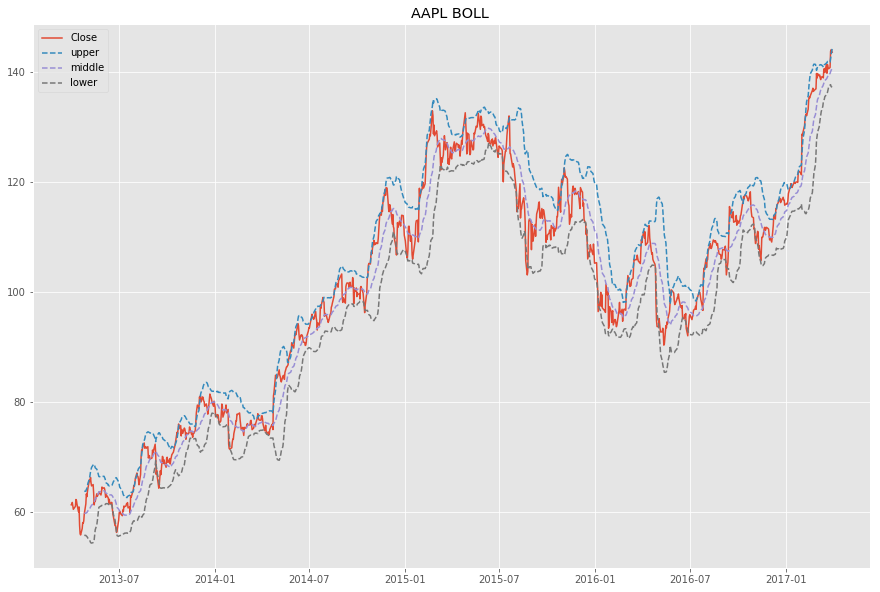

In [18]:
# 绘图
fig = plt.figure(figsize = (15,10))
plt.plot(data['Close'])
plt.plot(data['upper'], linestyle='--')
plt.plot(data['middle'], linestyle='--')
plt.plot(data['lower'], linestyle='--')
plt.title('AAPL BOLL ')
plt.legend()

In [22]:
DIF, DEA, MACD = talib.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)

fig = plt.figure(figsize = (10,6))
plt.plot(data['Close'])
plt.plot(data['upper'], linestyle='--')
plt.plot(data['middle'], linestyle='--')
plt.plot(data['lower'], linestyle='--')
plt.title('AAPL MACD ')
plt.legend()

NameError: name 'fastperiod' is not defined

In [21]:
def timing_Basic_MACD(context):
    ##basic_macd算法在DIF上穿DEA时买入，在DIF下穿DEA时卖出  （操盘规则：预测）
    ##基于仓位管理的需要，每只股票最大投资额为10000元         （仓位管理：风控）
    #talib提供的MACD计算函数，计算DIF,DEF以及MACD的取值
    DIF, DEA, MACD = talib.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
    if MACD[-2]<0 and MACD[-1] > 0 and sec not in security_position:  # DIF上穿DEA，且无持仓
            buylist.append(sec)                                           #将股票sec加入购买列表
        elif MACD[-2]>0 and MACD[-1] < 0 and sec in security_position:  # DIF下穿DEA，且有持仓
            order_to(sec, 0)  # 全部卖出
            cash += security_position[sec].amount * context.current_price(sec)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [14]:
# 计算昨日数据
data['yes_close'] = data['Close'].shift(1)
data['yes_lower'] = data['lower'].shift(1)
data['yes_upper'] = data['upper'].shift(1)
# 计算前天数据
data['daybeforeyes_close'] = data['Close'].shift(2)
data['daybeforeyes_lower'] = data['lower'].shift(2)
data['daybeforeyes_upper'] = data['upper'].shift(2)

In [16]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper
Date,,,,,,,,,,,,,,,
2017-03-27,141.220001,138.619995,139.389999,140.880005,23575100.0,136.081879,141.882371,139.784501,137.686630,140.639999,137.213258,141.960743,140.919998,136.748313,142.027688
2017-03-28,144.039993,140.619995,140.910004,143.800003,33374800.0,138.902451,142.491498,140.125001,137.758503,140.880005,137.686630,141.882371,140.639999,137.213258,141.960743
2017-03-29,144.490005,143.190002,143.679993,144.119995,29190000.0,139.211563,143.271069,140.341501,137.411932,143.800003,137.758503,142.491498,140.880005,137.686630,141.882371
2017-03-30,144.500000,143.500000,144.190002,143.929993,21207300.0,139.028015,143.834860,140.590000,137.345141,144.119995,137.411932,143.271069,143.800003,137.758503,142.491498
2017-03-31,144.270004,143.009995,143.720001,143.660004,19661700.0,138.767197,144.267150,140.784000,137.300851,143.929993,137.345141,143.834860,144.119995,137.411932,143.271069


In [17]:
# 计算交易信号
# 开多信号:前天收盘价低于下轨，昨日收盘价高于下轨
data['signal'] = np.where(np.logical_and(
                             data['daybeforeyes_close'] <data['daybeforeyes_lower'],
                             data['yes_close'] > data['yes_lower']),
                             1, 0)
# 开空信号：前天日收盘价高于上轨，昨日收盘价低于上轨
data['signal'] = np.where(np.logical_and(
                             data['daybeforeyes_close'] > data['daybeforeyes_upper'],
                             data['yes_close'] < data['yes_upper']),
                             -1, data['signal'])

In [19]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal
Date,,,,,,,,,,,,,,,,
2017-03-27,141.220001,138.619995,139.389999,140.880005,23575100.0,136.081879,141.882371,139.784501,137.686630,140.639999,137.213258,141.960743,140.919998,136.748313,142.027688,0
2017-03-28,144.039993,140.619995,140.910004,143.800003,33374800.0,138.902451,142.491498,140.125001,137.758503,140.880005,137.686630,141.882371,140.639999,137.213258,141.960743,0
2017-03-29,144.490005,143.190002,143.679993,144.119995,29190000.0,139.211563,143.271069,140.341501,137.411932,143.800003,137.758503,142.491498,140.880005,137.686630,141.882371,0
2017-03-30,144.500000,143.500000,144.190002,143.929993,21207300.0,139.028015,143.834860,140.590000,137.345141,144.119995,137.411932,143.271069,143.800003,137.758503,142.491498,0
2017-03-31,144.270004,143.009995,143.720001,143.660004,19661700.0,138.767197,144.267150,140.784000,137.300851,143.929993,137.345141,143.834860,144.119995,137.411932,143.271069,0


Text(0.5,0.98,'AAPL bolling transaction signal')

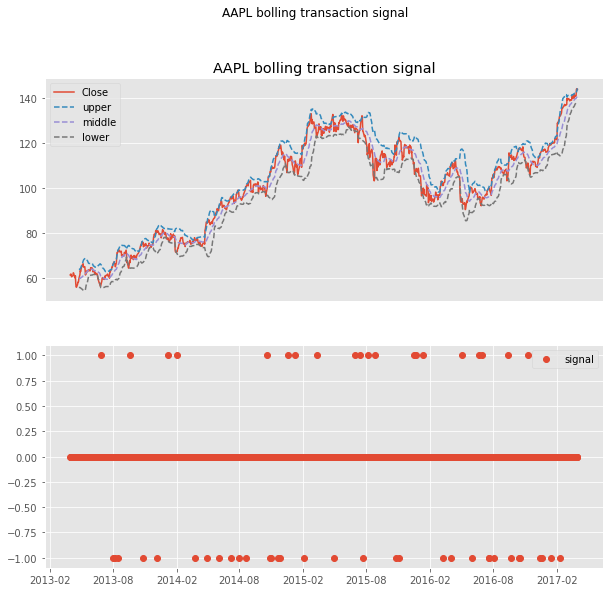

In [20]:
# 绘制交易信号图
plt.subplot(2,1,1)
plt.title('AAPL bolling transaction signal')
plt.gca().axes.get_xaxis().set_visible(False)
data['Close'].plot(figsize=(10,10))
plt.plot(data['upper'], linestyle='--')
plt.plot(data['middle'], linestyle='--')
plt.plot(data['lower'], linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['signal'], marker='o', linestyle='')
plt.legend()
plt.suptitle('AAPL bolling transaction signal')
# plt.show()

In [21]:
# 使用position标记持仓情况，全新的循环法思路；
position = 0
# 对每个交易日进行循环    
for item in data.iterrows():   #逐行遍历；返回的这个item其实一个元组，（label，series）
    # 判断交易信号
    if item[1]['signal'] == 1:
        # 交易信号为1，则记录仓位为1，持有多仓；
        position = 1
    elif item[1]['signal'] == -1:
        # 交易信号为-1， 则记录仓位为-1，持有空仓；
        position = -1
    else:
        pass     #啥都不做；
    # 记录每日持仓情况
    data.loc[item[0], 'position'] = position      #自动往下填充的就是上一个产生的交易信号；关键；

In [22]:
# 使用position标记持仓情况，全新的循环法思路；另外一种方法；
position = 0
# 对每个交易日进行循环    
for i, item in data.iterrows():   #逐行遍历；这里item就是一个Series； unpacked
    # 判断交易信号
    if item['signal'] == 1:
        # 交易信号为1，则记录仓位为1，持有多仓；
        position = 1
    elif item['signal'] == -1:
        # 交易信号为-1， 则记录仓位为-1，持有空仓；
        position = -1
    else:
        pass
    # 记录每日持仓情况
    data.loc[i, 'position'] = position      #在DataFrame中自动往下填充的就是上一个产生的交易信号；关键；

In [23]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal,position
Date,,,,,,,,,,,,,,,,,
2017-03-27,141.220001,138.619995,139.389999,140.880005,23575100.0,136.081879,141.882371,139.784501,137.686630,140.639999,137.213258,141.960743,140.919998,136.748313,142.027688,0,-1.0
2017-03-28,144.039993,140.619995,140.910004,143.800003,33374800.0,138.902451,142.491498,140.125001,137.758503,140.880005,137.686630,141.882371,140.639999,137.213258,141.960743,0,-1.0
2017-03-29,144.490005,143.190002,143.679993,144.119995,29190000.0,139.211563,143.271069,140.341501,137.411932,143.800003,137.758503,142.491498,140.880005,137.686630,141.882371,0,-1.0
2017-03-30,144.500000,143.500000,144.190002,143.929993,21207300.0,139.028015,143.834860,140.590000,137.345141,144.119995,137.411932,143.271069,143.800003,137.758503,142.491498,0,-1.0
2017-03-31,144.270004,143.009995,143.720001,143.660004,19661700.0,138.767197,144.267150,140.784000,137.300851,143.929993,137.345141,143.834860,144.119995,137.411932,143.271069,0,-1.0


Text(0.5,0.98,'AAPL bolling position')

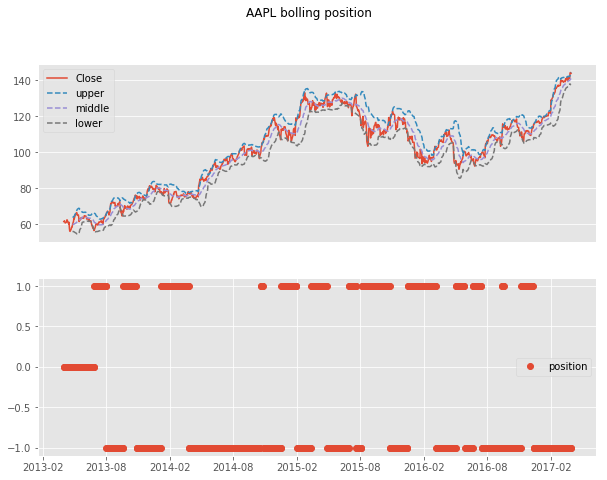

In [25]:
# 绘制持仓情况图
plt.subplot(2,1,1)
plt.gca().axes.get_xaxis().set_visible(False)
data['Close'].plot(figsize=(10,8))
plt.plot(data['upper'], linestyle='--')
plt.plot(data['middle'], linestyle='--')
plt.plot(data['lower'], linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['position'], marker='o', linestyle='')
plt.legend()
plt.suptitle('AAPL bolling position')

In [27]:
# 计算股票每日收益率
data['pct_change'] = data['Close'].pct_change()
# 计算股票的累积收益率
data['return'] = (data['pct_change'] + 1).cumprod()
# 计算策略每日收益率
data['strategy_return'] = data['position'] * data['pct_change']
# 计算策略累积收益率
data['cum_strategy_return'] = (data['strategy_return'] + 1).cumprod()

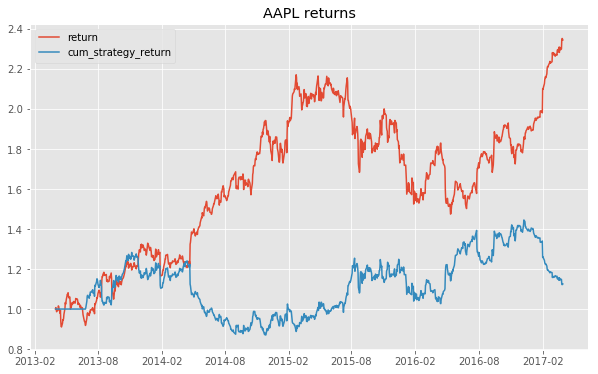

In [28]:
# 绘图
fig = plt.figure(figsize = (10,6))
plt.plot(data['return'])
plt.plot(data['cum_strategy_return'])
plt.title('AAPL returns')
plt.legend(loc='upper left')
plt.show()

In [ ]:
if MACD[-2]<0 and MACD[-1] > 0 and sec not in security_position:  # DIF上穿DEA，且无持仓
            buylist.append(sec)                                           #将股票sec加入购买列表
        elif MACD[-2]>0 and MACD[-1] < 0 and sec in security_position:  # DIF下穿DEA，且有持仓
            order_to(sec, 0)  # 全部卖出
            cash += security_position[sec].amount * context.current_price(sec)  # 估计卖出股票后的账户金额，注：context.current_price(sec) 是获取sec股票当前价格

In [153]:
data['SMA_10'] = data['Close'].rolling(10).mean()
data['SMA_60'] = data['Close'].rolling(60).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_60
Date,,,,,,,,
2013-04-01,63.385715,61.105713,63.128571,61.272858,97433000.0,45.166916,NaN,NaN
2013-04-02,62.591427,60.914288,61.085712,61.398571,132379800.0,45.259586,NaN,NaN
2013-04-03,62.468571,61.472858,61.624287,61.712856,90804000.0,45.491261,NaN,NaN
2013-04-04,62.142857,60.750000,61.965714,61.102856,89611900.0,45.041603,NaN,NaN
2013-04-05,60.707142,59.954285,60.642857,60.457142,95923800.0,44.565617,NaN,NaN


In [154]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_60
Date,,,,,,,,
2017-03-27,141.220001,138.619995,139.389999,140.880005,23575100.0,136.081879,140.529002,130.387000
2017-03-28,144.039993,140.619995,140.910004,143.800003,33374800.0,138.902451,141.010002,130.838166
2017-03-29,144.490005,143.190002,143.679993,144.119995,29190000.0,139.211563,141.376001,131.309833
2017-03-30,144.500000,143.500000,144.190002,143.929993,21207300.0,139.028015,141.700000,131.772833
2017-03-31,144.270004,143.009995,143.720001,143.660004,19661700.0,138.767197,142.067000,132.233500


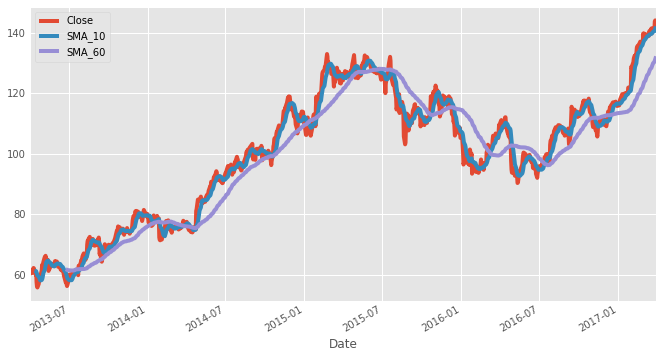

In [155]:
data[['Close','SMA_10','SMA_60']].plot(figsize=(10,6))  #plot

In [156]:
# short > long :1 long
#short < long :-1 short
data['position'] = np.where(data['SMA_10'] > data['SMA_60'], 1, -1)
data.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_60,position
Date,,,,,,,,,
2013-04-01,63.385715,61.105713,63.128571,61.272858,97433000.0,45.166916,NaN,NaN,-1
2013-04-02,62.591427,60.914288,61.085712,61.398571,132379800.0,45.259586,NaN,NaN,-1
2013-04-03,62.468571,61.472858,61.624287,61.712856,90804000.0,45.491261,NaN,NaN,-1
2013-04-04,62.142857,60.750000,61.965714,61.102856,89611900.0,45.041603,NaN,NaN,-1
2013-04-05,60.707142,59.954285,60.642857,60.457142,95923800.0,44.565617,NaN,NaN,-1


In [161]:
data.dropna(inplace=True)

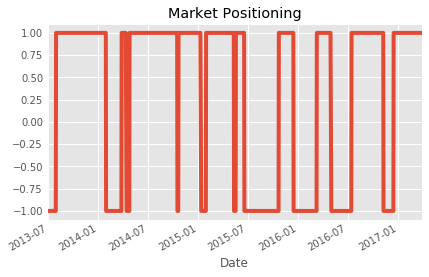

In [162]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

In [163]:
#calcu late the stock return
data['returns']=np.log(data['Close']/data['Close'].shift(1)) #ln(pt/pt-1),shift(1)
data.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_60,position,returns
Date,,,,,,,,,,
2013-06-25,58.255714,56.975716,57.957142,57.518570,78540700.0,44.445229,60.292571,61.786333,-1,NaN
2013-06-26,57.827145,56.522858,57.700001,56.867142,91931000.0,43.941856,59.805143,61.710809,-1,-0.011390
2013-06-27,57.341427,56.220001,57.035713,56.254284,84311500.0,43.468304,59.202571,61.619833,-1,-0.010836
2013-06-28,57.181427,55.552856,55.908573,56.647144,144629100.0,43.771873,58.723714,61.545571,-1,0.006959
2013-07-01,58.895714,57.317142,57.527142,58.459999,97763400.0,45.172672,58.398285,61.512286,-1,0.031501


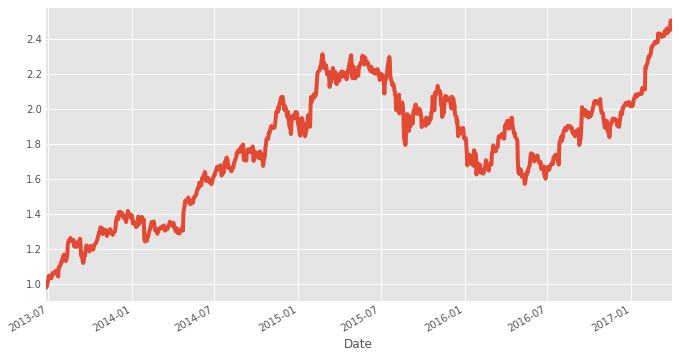

In [164]:
data['returns'].cumsum().apply(np.exp).plot(figsize=(10, 6)) 

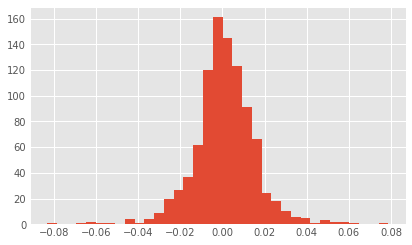

In [165]:
data['returns'].hist(bins=35)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 950 entries, 2013-06-25 to 2017-03-31
Data columns (total 10 columns):
High         950 non-null float64
Low          950 non-null float64
Open         950 non-null float64
Close        950 non-null float64
Volume       950 non-null float64
Adj Close    950 non-null float64
SMA_10       950 non-null float64
SMA_60       950 non-null float64
position     950 non-null int32
returns      949 non-null float64
dtypes: float64(9), int32(1)
memory usage: 77.9 KB


In [167]:
#strategy return
data['strategy'] = data['position'].shift(1) * data['returns']   #Back test should not use the real data(futurn data).
#data[['returns','strategy']].sum()

In [168]:
data[['returns', 'strategy']].sum()


returns     0.915342
strategy    0.168731
dtype: float64

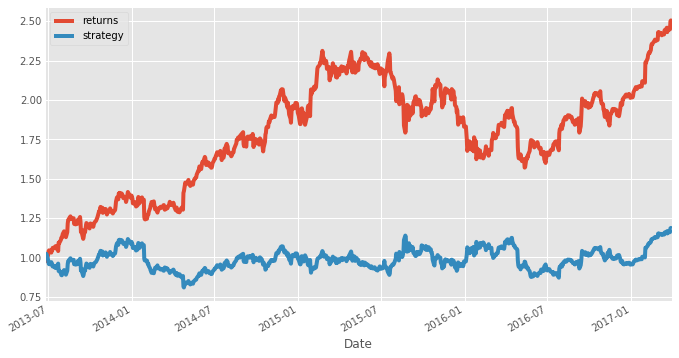

In [169]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))  

Risk analysis:

In [170]:
data[['returns', 'strategy']].mean() * 252 #yield return

returns     0.243062
strategy    0.044805
dtype: float64

In [171]:
data[['returns', 'strategy']].std() * 252 ** 0.5 #risk

returns     0.235750
strategy    0.236231
dtype: float64

In [178]:
#max drawdown

data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [179]:
data['cummax'] = data['cumret'].cummax()

In [180]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_60,position,returns,strategy,cumret,cummax
Date,,,,,,,,,,,,,
2017-03-27,141.220001,138.619995,139.389999,140.880005,23575100.0,136.081879,140.529002,130.387000,1,0.001705,0.001705,1.160894,1.165673
2017-03-28,144.039993,140.619995,140.910004,143.800003,33374800.0,138.902451,141.010002,130.838166,1,0.020515,0.020515,1.184955,1.184955
2017-03-29,144.490005,143.190002,143.679993,144.119995,29190000.0,139.211563,141.376001,131.309833,1,0.002223,0.002223,1.187592,1.187592
2017-03-30,144.500000,143.500000,144.190002,143.929993,21207300.0,139.028015,141.700000,131.772833,1,-0.001319,-0.001319,1.186027,1.187592
2017-03-31,144.270004,143.009995,143.720001,143.660004,19661700.0,138.767197,142.067000,132.233500,1,-0.001878,-0.001878,1.183802,1.187592


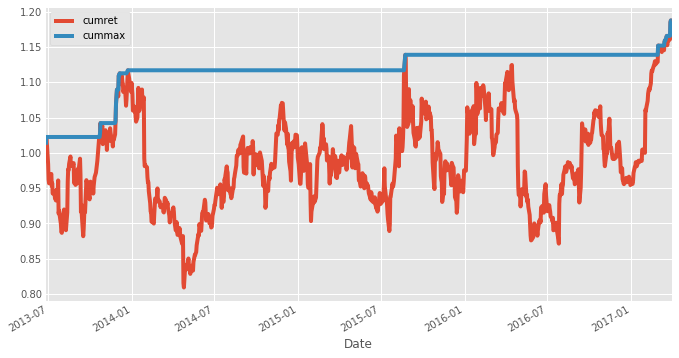

In [181]:
data[['cumret', 'cummax']].plot(figsize=(10, 6))

In [182]:
drawdown = (data['cummax'] - data['cumret'])

In [183]:
drawdown.max() 

0.30767612990529325